In [4]:
import numpy as np 
import pandas as pd

In [5]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df = pd.read_csv("Liver Patient Dataset (LPD)_train.csv", encoding="latin1")
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [7]:
df.shape

(30691, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [9]:
df.columns = ['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result']

In [10]:
df["Age of the patient"] = df["Age of the patient"].fillna(df["Age of the patient"].mode()[0])
df["Gender of the patient"] = df["Gender of the patient"].fillna(df["Gender of the patient"].mode()[0])
df["Total Bilirubin"] = df["Total Bilirubin"].fillna(df["Total Bilirubin"].mean())
df["Direct Bilirubin"] = df["Direct Bilirubin"].fillna(df["Direct Bilirubin"].mean())
df["Alkphos Alkaline Phosphotase"] = df["Alkphos Alkaline Phosphotase"].fillna(df["Alkphos Alkaline Phosphotase"].mean())
df["Sgpt Alamine Aminotransferase"] = df["Sgpt Alamine Aminotransferase"].fillna(df["Sgpt Alamine Aminotransferase"].mean())
df["Sgot Aspartate Aminotransferase"] = df["Sgot Aspartate Aminotransferase"].fillna(df["Sgot Aspartate Aminotransferase"].mean())
df["Total Protiens"] = df["Total Protiens"].fillna(df["Total Protiens"].mean())
df["ALB Albumin"] = df["ALB Albumin"].fillna(df["ALB Albumin"].mean())
df["A/G Ratio Albumin and Globulin Ratio"] = df["A/G Ratio Albumin and Globulin Ratio"].fillna(df["A/G Ratio Albumin and Globulin Ratio"].mean())

In [11]:
df.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

<AxesSubplot:ylabel='Gender of the patient'>

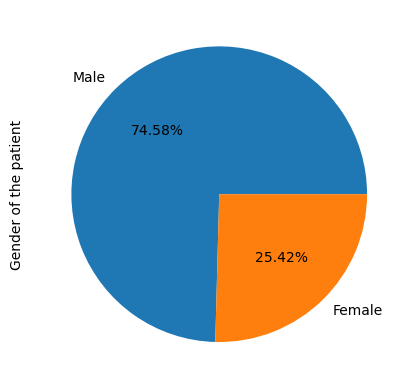

In [12]:
df["Gender of the patient"].value_counts().plot(kind="pie", autopct="%.2f%%")

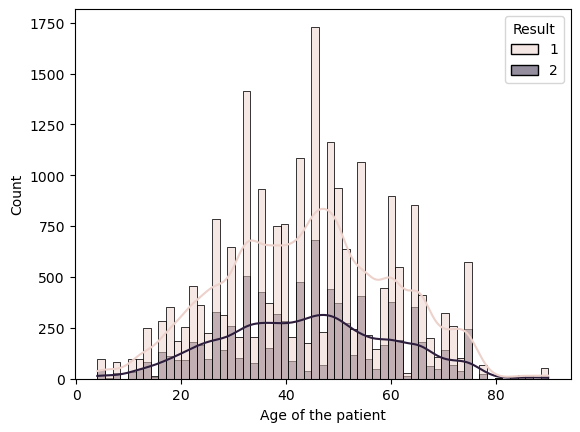

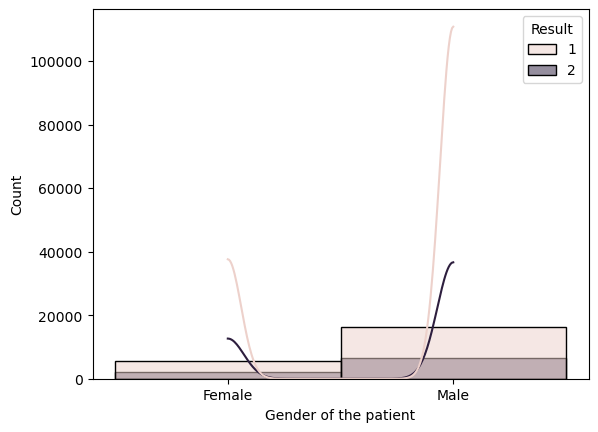

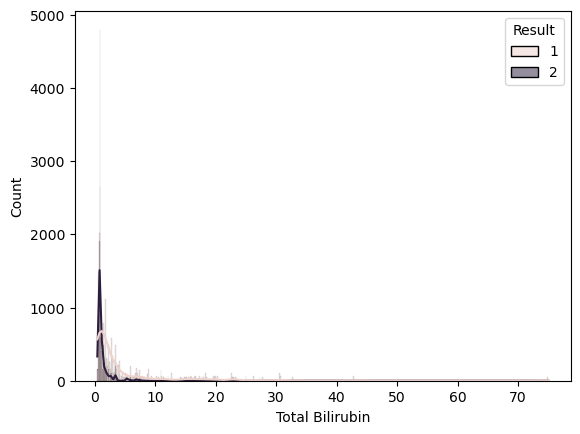

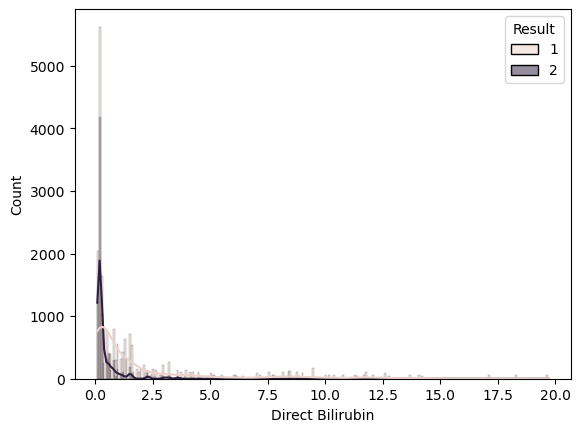

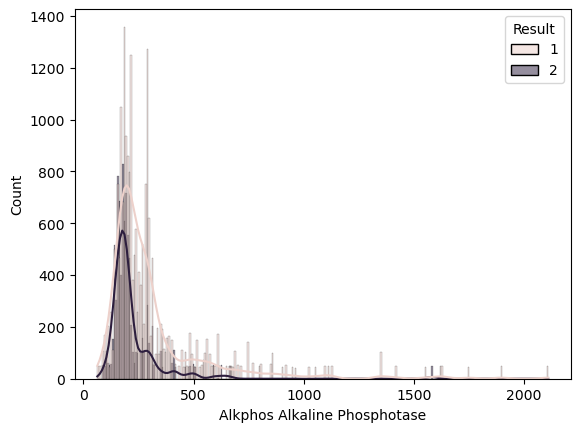

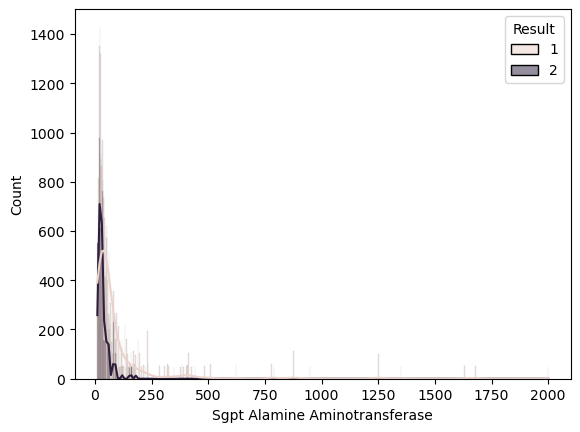

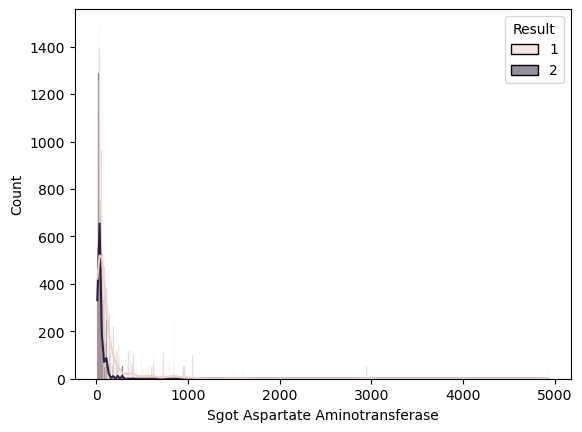

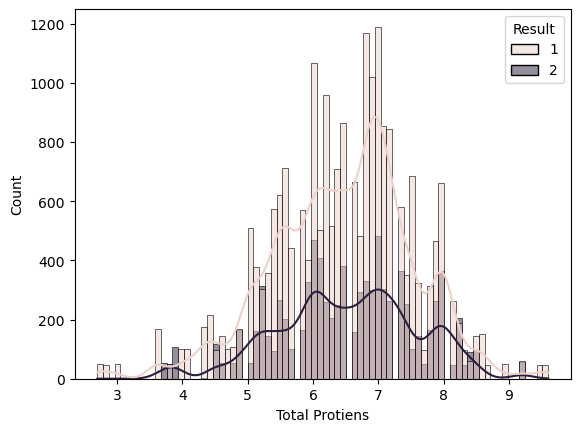

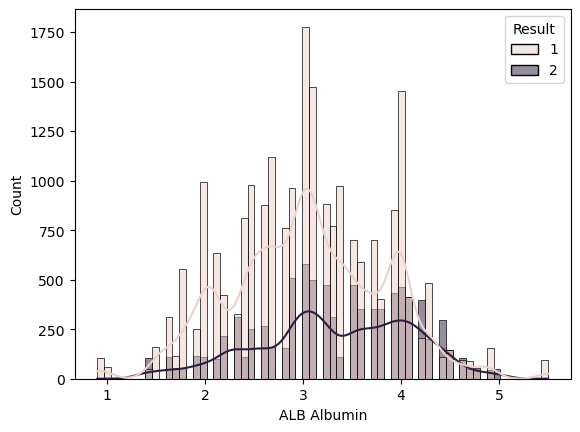

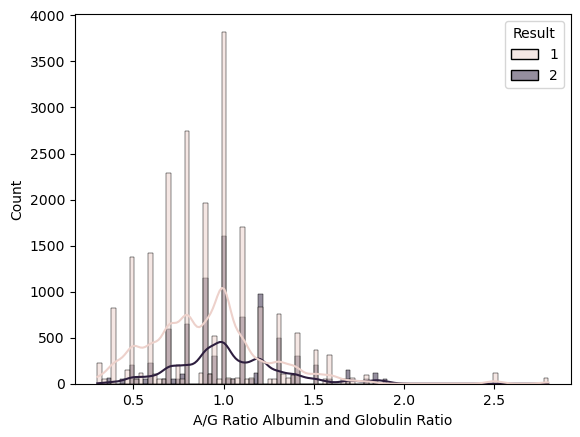

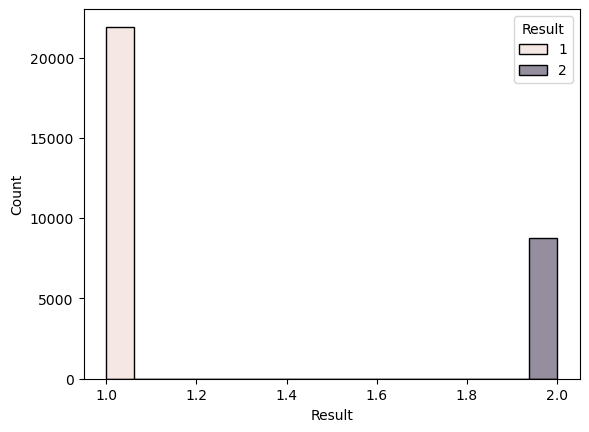

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    plt.figure()
    sns.histplot(data=df, x=col, hue="Result", kde=True)
    plt.show()

In [13]:
df["Result"] = df["Result"].map({
    1: 0, 2: 1
})

In [14]:
df["Gender of the patient"] = df["Gender of the patient"].map({
    "Male": 1, "Female": 0
})

In [15]:
X = df.drop("Result", axis=1)
y = df["Result"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9973937123309985